In [120]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [121]:
!pip install apyori
!pip install squarify
import numpy as np


In [122]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules


In [123]:
#importing the dataset
data = pd.read_csv('/content/drive/MyDrive/p2.0/Sales1.csv', header=None, sep=';')
data.head()

0           1      2        3             4       5       6   \
0          no         tgl  kasir   kd_brg      nama_brg  satuan   harga   
1  PC30000001  01/08/2021  DYMAS    8-008   TUNE UP EFI    UNIT  150000   
2  PC30000001  01/08/2021  DYMAS    8-009  GANTI OLI BS    UNIT   25000   
3  PC30000001  01/08/2021  DYMAS  8-009.1   GANTI F OLI    UNIT   25000   
4  PC30000002  01/08/2021  FREDY    1-018     SHELL HX5     LTR   85000   

        7      8    9       10      11      12  
0    disc1  disc2  qty     jml   total   tunai  
1    MESIN      0    1  150000  200000  200000  
2  PELUMAS      0    1   25000  200000  200000  
3  PELUMAS      0    1   25000  200000  200000  
4  PELUMAS      0    3  255000  255000  255000

In [124]:
import pandas as pd

# Membaca data
data = pd.read_csv("/content/drive/MyDrive/p2.0/Sales1.csv", header=None, sep=';')
# Correcting column names to match data (assuming 26 columns)
data.columns = ["no", "tgl", "kasir", "kd_brg", "nama_brg", "satuan", "harga", "disc1", "disc2", "qty", "jml", "total", "tunai"]

# Menyimpan data
data.to_csv("data_baru.csv", index=False)


In [125]:

data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5071 entries, 0 to 5070
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   no        5071 non-null   object
 1   tgl       5071 non-null   object
 2   kasir     4890 non-null   object
 3   kd_brg    5071 non-null   object
 4   nama_brg  5070 non-null   object
 5   satuan    5070 non-null   object
 6   harga     5071 non-null   object
 7   disc1     5070 non-null   object
 8   disc2     5071 non-null   object
 9   qty       5071 non-null   object
 10  jml       5071 non-null   object
 11  total     5071 non-null   object
 12  tunai     5071 non-null   object
dtypes: object(13)
memory usage: 515.1+ KB


In [126]:
data.isna().sum()

no            0
tgl           0
kasir       181
kd_brg        0
nama_brg      1
satuan        1
harga         0
disc1         1
disc2         0
qty           0
jml           0
total         0
tunai         0
dtype: int64

In [127]:
data.dropna(inplace=True)
len(data)


4890

In [128]:
data.head()

no         tgl  kasir   kd_brg      nama_brg  satuan   harga  \
0          no         tgl  kasir   kd_brg      nama_brg  satuan   harga   
1  PC30000001  01/08/2021  DYMAS    8-008   TUNE UP EFI    UNIT  150000   
2  PC30000001  01/08/2021  DYMAS    8-009  GANTI OLI BS    UNIT   25000   
3  PC30000001  01/08/2021  DYMAS  8-009.1   GANTI F OLI    UNIT   25000   
4  PC30000002  01/08/2021  FREDY    1-018     SHELL HX5     LTR   85000   

     disc1  disc2  qty     jml   total   tunai  
0    disc1  disc2  qty     jml   total   tunai  
1    MESIN      0    1  150000  200000  200000  
2  PELUMAS      0    1   25000  200000  200000  
3  PELUMAS      0    1   25000  200000  200000  
4  PELUMAS      0    3  255000  255000  255000

In [129]:
data.head()

no         tgl  kasir   kd_brg      nama_brg  satuan   harga  \
0          no         tgl  kasir   kd_brg      nama_brg  satuan   harga   
1  PC30000001  01/08/2021  DYMAS    8-008   TUNE UP EFI    UNIT  150000   
2  PC30000001  01/08/2021  DYMAS    8-009  GANTI OLI BS    UNIT   25000   
3  PC30000001  01/08/2021  DYMAS  8-009.1   GANTI F OLI    UNIT   25000   
4  PC30000002  01/08/2021  FREDY    1-018     SHELL HX5     LTR   85000   

     disc1  disc2  qty     jml   total   tunai  
0    disc1  disc2  qty     jml   total   tunai  
1    MESIN      0    1  150000  200000  200000  
2  PELUMAS      0    1   25000  200000  200000  
3  PELUMAS      0    1   25000  200000  200000  
4  PELUMAS      0    3  255000  255000  255000

In [130]:

data.describe()

no         tgl         kasir   kd_brg  nama_brg satuan  harga  \
count         4890        4890          4890     4890      4890   4890   4890   
unique        1959         153            28      965       913     12    120   
top     PC30002074  11/12/2021  AHMAD JAYADI  8-009.1   SERVICE   UNIT  25000   
freq            38         110          1293      432       512   2246    844   

          disc1 disc2   qty    jml  total  tunai  
count      4890  4890  4890   4890   4890   4890  
unique       19     2    10    140    310    330  
top     PELUMAS     0     1  25000  50000  50000  
freq       2820  4889  4334    798    344    344

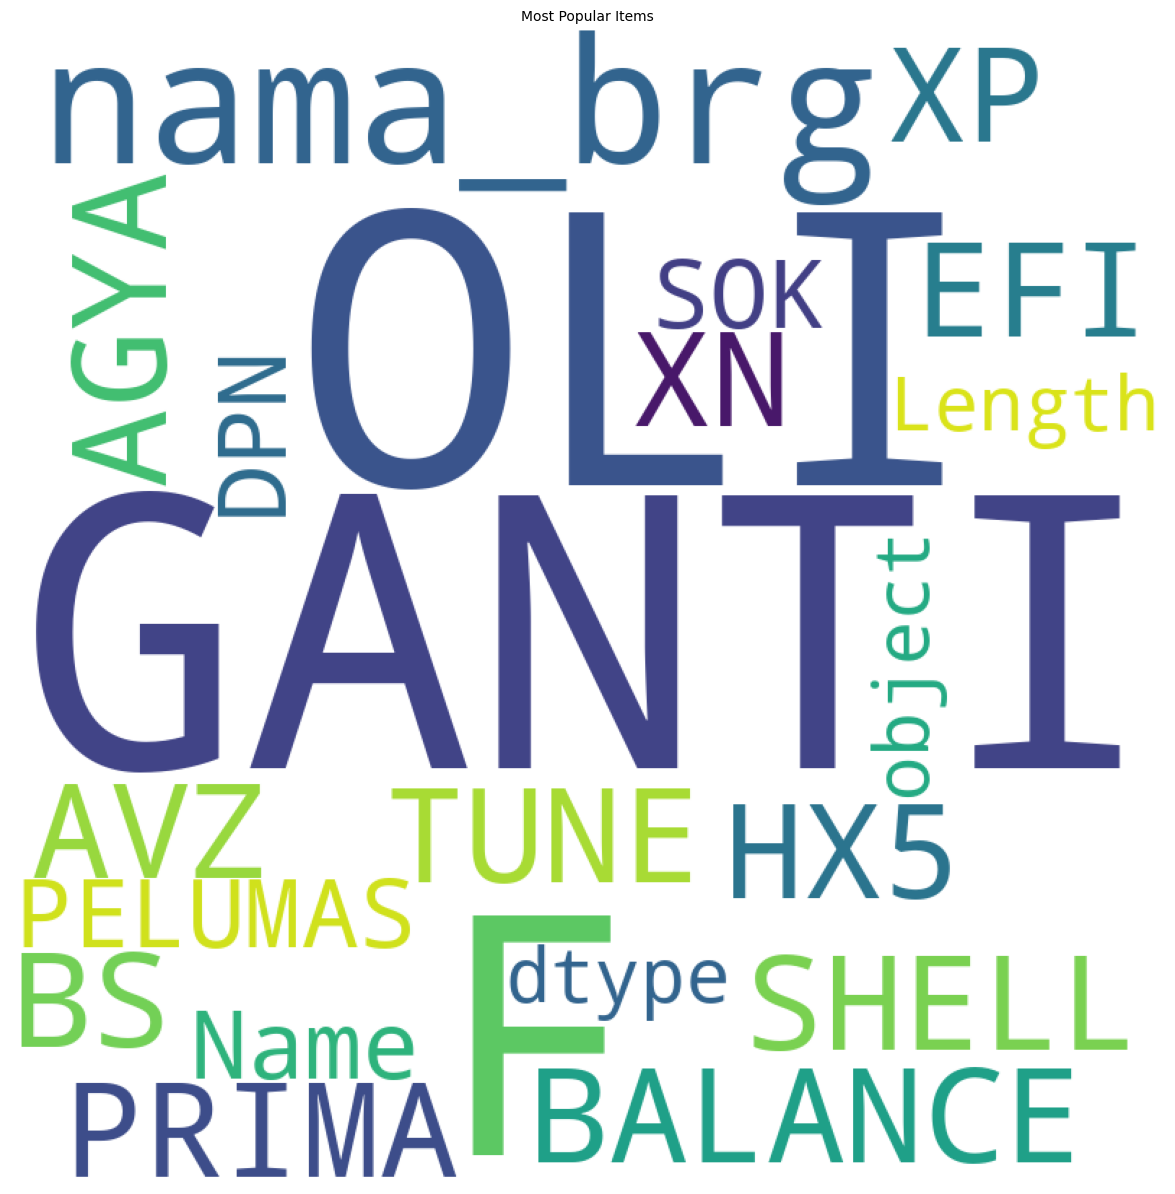

In [131]:
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud

plt.rcParams['figure.figsize'] = (15, 15)
wordcloud = WordCloud(background_color = 'white', width = 800,  height = 800, max_words = 90).generate(str(data['nama_brg']))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Popular Items',fontsize = 10)
plt.show()

Text(0.5, 1.0, 'frequency of most popular items')

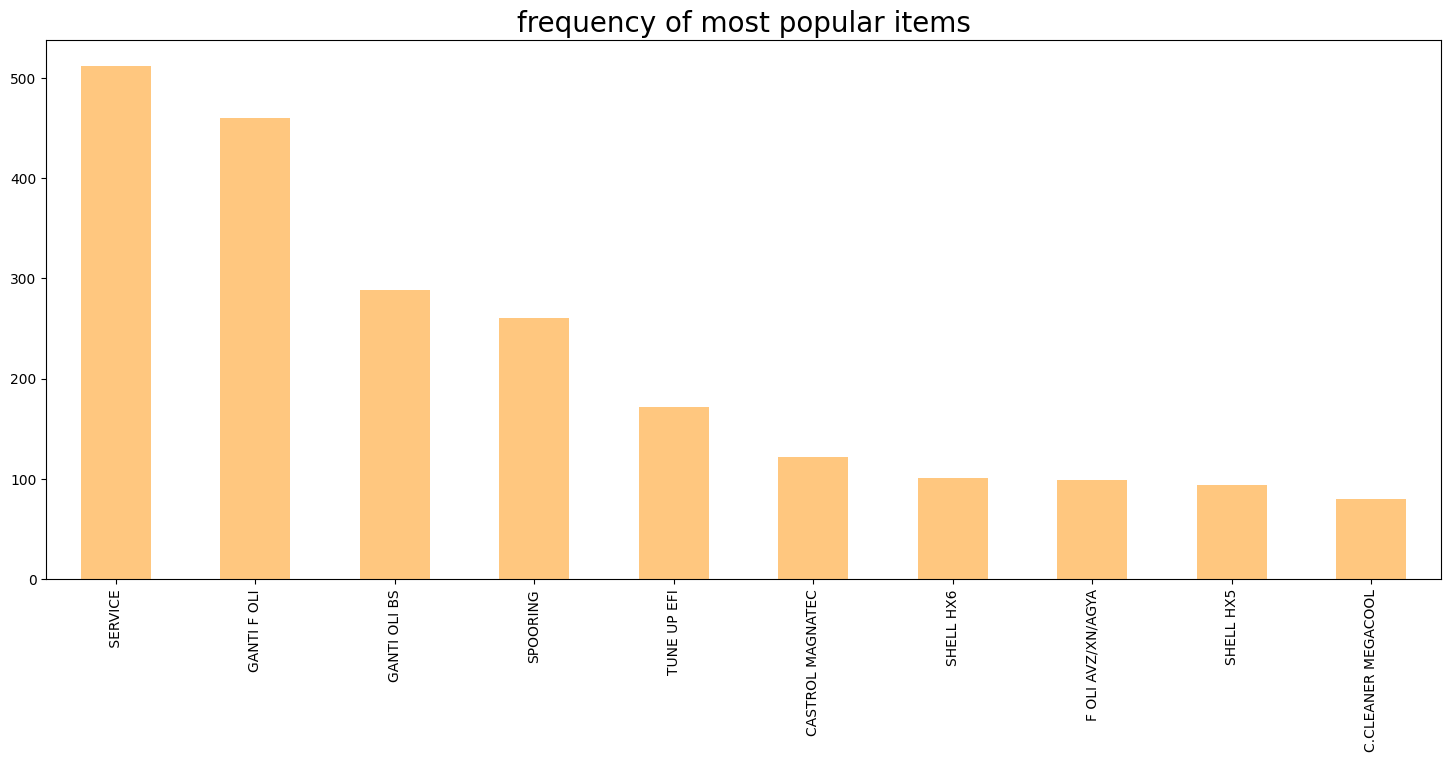

In [132]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'harga' is a column in your DataFrame
data['harga'] = pd.to_numeric(data['harga'], errors='coerce')

plt.rcParams['figure.figsize'] = (18, 7)

# Now 'harga' should be numeric, and you can use it in np.linspace
color = plt.cm.copper(np.linspace(data['harga'].min(), data['harga'].max(), len(data)))
data['nama_brg'].value_counts().head(10).plot.bar(color=color)

plt.title('frequency of most popular items', fontsize=20)



In [133]:
y = data['nama_brg'].value_counts().head(50).to_frame()
y.index

Index([' SERVICE', 'GANTI F OLI', 'GANTI OLI BS', 'SPOORING', 'TUNE UP EFI',
       'CASTROL MAGNATEC', 'SHELL HX6', 'F OLI AVZ/XN/AGYA', 'SHELL HX5',
       'C.CLEANER MEGACOOL', 'GANTI KAMPAS REM DPN', 'SCAN', 'PRIMA XP 20/50',
       'AIR ACCU TAWAR', 'BALANCE', 'F OLI INV 90915-YZZ2', 'FASTRON 10/40',
       'GANTI F SOLAR/BENSIN', 'CASTROL 10/30 DSL', 'FULL PENETRAT MEGACOOL',
       'GANTI VANBELT', 'LEM TRIBON NEW', 'MEDITRAN SC', 'F OLI YARIS/VIOS',
       'BAUT', 'SHELL HX7 5W/40', 'MEDITRAN SX', 'CASTROL GTX DSL HITAM',
       'PRIMA XP 10/40', 'NITROGEN', 'KURAS RADIATOR', ' GANTI BUSI',
       'OLI MATIC', 'BUSI XU22PR9 AVANZA', 'OLI TMO 10/40 BSN',
       'CASTROL GTX ULTRA 5/30', ' SERVICE VARIASI', 'F OLI HONDA', 'F OLI G',
       'FREON HFC-134A.', 'BENSIN/SOLAR', 'RAD COOLANT KTB HIJAU',
       'RAD COOLANT KTB MRH', 'M.REM PETRO KCL DOT 4', 'FASTRON 15/40',
       'CEK REM', 'TUNE UP', 'GANTI BERING RD DPN', 'BOKLAM K2 PHILIPS.',
       'ATF IDEMITSU'],
      dtype='o

In [134]:
!pip install squarify


(0.0, 100.0, 0.0, 100.0)

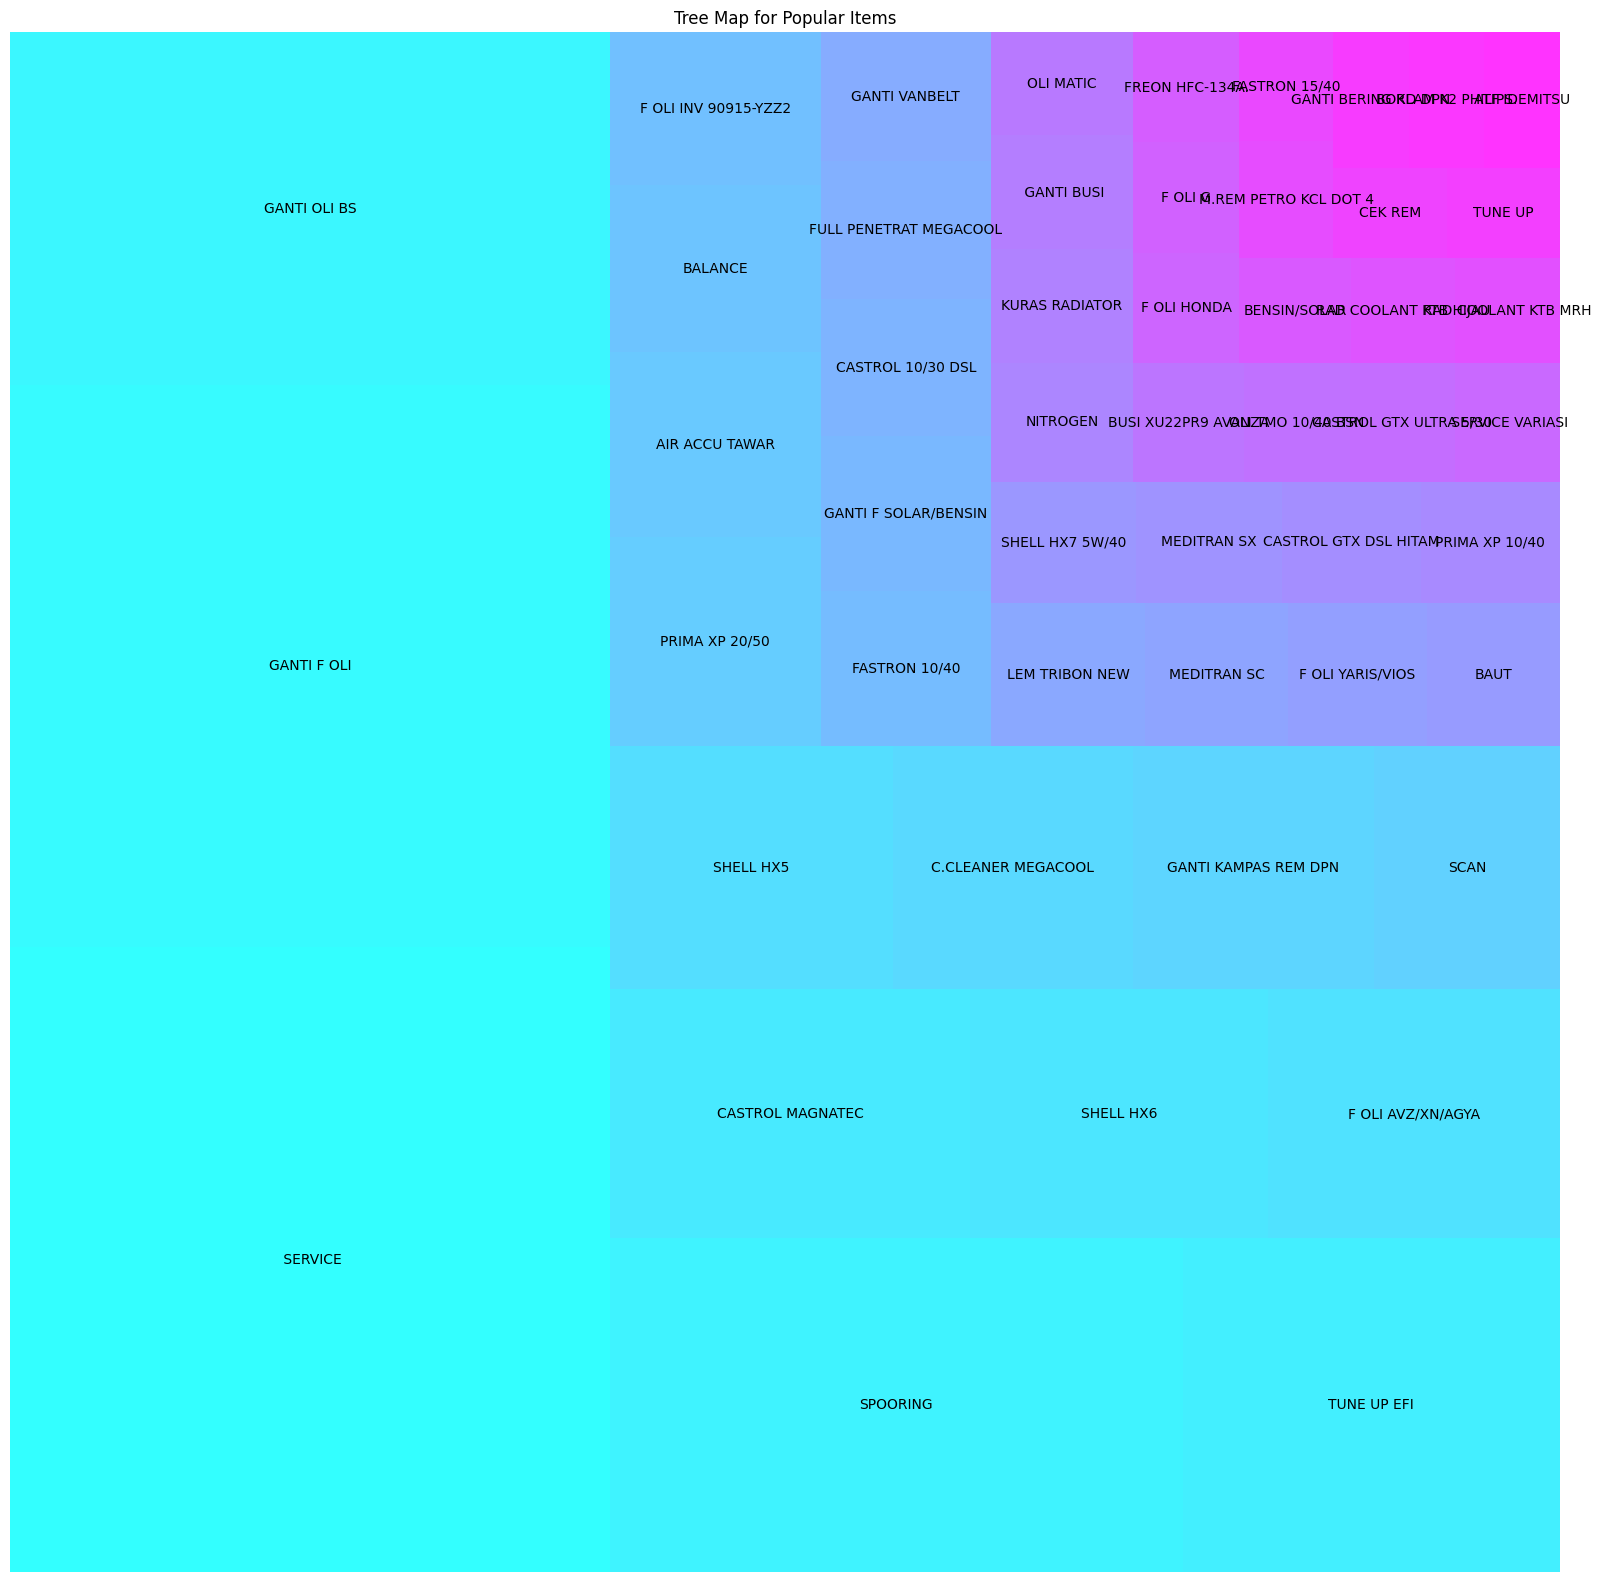

In [135]:
import squarify  # Add this import statement at the beginning of your code

# Rest of your code
plt.rcParams['figure.figsize'] = (20, 20)
color = plt.cm.cool(np.linspace(0, 1, 50))
squarify.plot(sizes=y.values, label=y.index, alpha=.8, color=color)
plt.title('Tree Map for Popular Items')
plt.axis('off')


In [136]:
# Converting the DataFrame to a list of lists
trans_list = data.values.tolist()

# Converting the list of lists to a NumPy array
trans_np = np.array(trans_list)

# Checking the shape of the array
print(trans_np.shape)


(4890, 13)


In [137]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

# Your list of services or items
services_list = ['SERVICE', 'GANTI F OLI', 'GANTI OLI BS', 'SPOORING', 'TUNE UP EFI',
       'CASTROL MAGNATEC', 'SHELL HX6', 'F OLI AVZ/XN/AGYA', 'SHELL HX5',
       'C.CLEANER MEGACOOL', 'GANTI KAMPAS REM DPN', 'SCAN', 'PRIMA XP 20/50',
       'AIR ACCU TAWAR', 'BALANCE', 'F OLI INV 90915-YZZ2', 'FASTRON 10/40',
       'GANTI F SOLAR/BENSIN', 'CASTROL 10/30 DSL', 'FULL PENETRAT MEGACOOL',
       'GANTI VANBELT', 'LEM TRIBON NEW', 'MEDITRAN SC', 'F OLI YARIS/VIOS',
       'BAUT', 'SHELL HX7 5W/40', 'MEDITRAN SX', 'CASTROL GTX DSL HITAM',
       'PRIMA XP 10/40', 'NITROGEN', 'KURAS RADIATOR', ' GANTI BUSI',
       'OLI MATIC', 'BUSI XU22PR9 AVANZA', 'OLI TMO 10/40 BSN',
       'CASTROL GTX ULTRA 5/30', ' SERVICE VARIASI', 'F OLI HONDA', 'F OLI G',
       'FREON HFC-134A.', 'BENSIN/SOLAR', 'RAD COOLANT KTB HIJAU',
       'RAD COOLANT KTB MRH', 'M.REM PETRO KCL DOT 4', 'FASTRON 15/40',
       'CEK REM', 'TUNE UP', 'GANTI BERING RD DPN', 'BOKLAM K2 PHILIPS.',
       'ATF IDEMITSU']

# Creating a list of lists (transactions)
transactions = [service.split() for service in services_list]

# Applying TransactionEncoder
te = TransactionEncoder()
data = te.fit_transform(transactions)
df = pd.DataFrame(data, columns=te.columns_)

# Displaying the DataFrame
print(df)



    10/30  10/40  15/40  20/50      4   5/30  5W/40  90915-YZZ2   ACCU    AIR  \
0   False  False  False  False  False  False  False       False  False  False   
1   False  False  False  False  False  False  False       False  False  False   
2   False  False  False  False  False  False  False       False  False  False   
3   False  False  False  False  False  False  False       False  False  False   
4   False  False  False  False  False  False  False       False  False  False   
5   False  False  False  False  False  False  False       False  False  False   
6   False  False  False  False  False  False  False       False  False  False   
7   False  False  False  False  False  False  False       False  False  False   
8   False  False  False  False  False  False  False       False  False  False   
9   False  False  False  False  False  False  False       False  False  False   
10  False  False  False  False  False  False  False       False  False  False   
11  False  False  False  Fal

In [138]:
import pandas as pd
import numpy as np
from mlxtend.preprocessing import TransactionEncoder

# Your list of services or items
services_list = ['SERVICE', 'GANTI F OLI', 'GANTI OLI BS', 'SPOORING', 'TUNE UP EFI',
       'CASTROL MAGNATEC', 'SHELL HX6', 'F OLI AVZ/XN/AGYA', 'SHELL HX5',
       'C.CLEANER MEGACOOL', 'GANTI KAMPAS REM DPN', 'SCAN', 'PRIMA XP 20/50',
       'AIR ACCU TAWAR', 'BALANCE', 'F OLI INV 90915-YZZ2', 'FASTRON 10/40',
       'GANTI F SOLAR/BENSIN', 'CASTROL 10/30 DSL', 'FULL PENETRAT MEGACOOL',
       'GANTI VANBELT', 'LEM TRIBON NEW', 'MEDITRAN SC', 'F OLI YARIS/VIOS',
       'BAUT', 'SHELL HX7 5W/40', 'MEDITRAN SX', 'CASTROL GTX DSL HITAM',
       'PRIMA XP 10/40', 'NITROGEN', 'KURAS RADIATOR', ' GANTI BUSI',
       'OLI MATIC', 'BUSI XU22PR9 AVANZA', 'OLI TMO 10/40 BSN',
       'CASTROL GTX ULTRA 5/30', ' SERVICE VARIASI', 'F OLI HONDA', 'F OLI G',
       'FREON HFC-134A.', 'BENSIN/SOLAR', 'RAD COOLANT KTB HIJAU',
       'RAD COOLANT KTB MRH', 'M.REM PETRO KCL DOT 4', 'FASTRON 15/40',
       'CEK REM', 'TUNE UP', 'GANTI BERING RD DPN', 'BOKLAM K2 PHILIPS.',
       'ATF IDEMITSU']

# Creating a list of lists (transactions)
transactions = [service.split() for service in services_list]

# Applying TransactionEncoder
te = TransactionEncoder()
data = te.fit_transform(transactions)
df = pd.DataFrame(data, columns=te.columns_)

# Displaying the columns
print("Columns:", te.columns_)



Columns: ['10/30', '10/40', '15/40', '20/50', '4', '5/30', '5W/40', '90915-YZZ2', 'ACCU', 'AIR', 'ATF', 'AVANZA', 'AVZ/XN/AGYA', 'BALANCE', 'BAUT', 'BENSIN/SOLAR', 'BERING', 'BOKLAM', 'BS', 'BSN', 'BUSI', 'C.CLEANER', 'CASTROL', 'CEK', 'COOLANT', 'DOT', 'DPN', 'DSL', 'EFI', 'F', 'FASTRON', 'FREON', 'FULL', 'G', 'GANTI', 'GTX', 'HFC-134A.', 'HIJAU', 'HITAM', 'HONDA', 'HX5', 'HX6', 'HX7', 'IDEMITSU', 'INV', 'K2', 'KAMPAS', 'KCL', 'KTB', 'KURAS', 'LEM', 'M.REM', 'MAGNATEC', 'MATIC', 'MEDITRAN', 'MEGACOOL', 'MRH', 'NEW', 'NITROGEN', 'OLI', 'PENETRAT', 'PETRO', 'PHILIPS.', 'PRIMA', 'RAD', 'RADIATOR', 'RD', 'REM', 'SC', 'SCAN', 'SERVICE', 'SHELL', 'SOLAR/BENSIN', 'SPOORING', 'SX', 'TAWAR', 'TMO', 'TRIBON', 'TUNE', 'ULTRA', 'UP', 'VANBELT', 'VARIASI', 'XP', 'XU22PR9', 'YARIS/VIOS']


In [139]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori\
# Applying Apriori algorithm
result = apriori(df, min_support=0.01, use_colnames=True)

# Displaying the result
print(result)


     support                     itemsets
0       0.02                      (10/30)
1       0.06                      (10/40)
2       0.02                      (15/40)
3       0.02                      (20/50)
4       0.02                          (4)
..       ...                          ...
264     0.02   (RAD, COOLANT, HIJAU, KTB)
265     0.02     (MRH, RAD, COOLANT, KTB)
266     0.02     (M.REM, DOT, KCL, PETRO)
267     0.02    (KAMPAS, GANTI, DPN, REM)
268     0.02  (M.REM, 4, DOT, KCL, PETRO)

[269 rows x 2 columns]


In [140]:
from mlxtend.frequent_patterns import apriori

# Applying Apriori algorithm
frequent_itemsets = apriori(df, min_support=0.1, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))


In [142]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

# Assuming 'data' is a NumPy array, convert it to a Pandas DataFrame
transaction_data = pd.DataFrame(data[:, :6], columns=["no", "tgl", "kasir", "kd_brg", "nama_brg", "satuan"])

# Convert each row of the DataFrame to a list of items and ensure they are strings
transactions = transaction_data.apply(lambda row: [str(item) for item in row.tolist()], axis=1)

# Perform one-hot encoding
te = TransactionEncoder()
data_encoded = te.fit_transform(transactions)
data_encoded = pd.DataFrame(data_encoded, columns=te.columns_)

# Display the original and encoded data
print("Original Data:")
print(transaction_data.head())

print("\nEncoded Data:")
print(data_encoded.head())


Original Data:
      no    tgl  kasir  kd_brg  nama_brg  satuan
0  False  False  False   False     False   False
1  False  False  False   False     False   False
2  False  False  False   False     False   False
3  False  False  False   False     False   False
4  False  False  False   False     False   False

Encoded Data:
   False   True
0   True  False
1   True  False
2   True  False
3   True  False
4   True  False


In [143]:
from apyori import apriori

# Apply the Apriori algorithm to get association rules
rules = apriori(transactions=data_encoded.values, min_support=0.2, min_confidence=0.2, min_lift=1, min_length=2)

# Convert the rules to a list so that we can print them
rules_list = list(rules)

# Display the rules
for rule in rules_list:
    print("Rule:", rule[0], "Support:", rule[1], "Confidence:", rule[2][0][2], "Lift:", rule[2][0][3])

Rule: frozenset({False}) Support: 0.84 Confidence: 0.84 Lift: 1.0
Rule: frozenset({True}) Support: 1.0 Confidence: 1.0 Lift: 1.0
Rule: frozenset({False, True}) Support: 0.84 Confidence: 0.84 Lift: 1.0


In [144]:
results = list(rules)

In [145]:
#Putting the results well organised into a Pandas DataFrame
def inspect(results):
    lhs         = [tuple(result[2][0][0])[0] for result in results]
    rhs         = [tuple(result[2][0][1])[0] for result in results]
    supports    = [result[1] for result in results]
    confidences = [result[2][0][2] for result in results]
    lifts       = [result[2][0][3] for result in results]
    return list(zip(lhs, rhs, supports, confidences, lifts))
resultsinDataFrame = pd.DataFrame(inspect(results), columns = ['Left Hand Side', 'Right Hand Side', 'Support', 'Confidence', 'Lift'])

In [147]:
# Now you can use groupby on transaction_data
hot_encoded_data = transaction_data.groupby(['nama_brg', 'satuan'])['tgl'].count().unstack().reset_index().fillna(0).set_index('nama_brg')


In [148]:
hot_encoded_data.head()

satuan    False  True
nama_brg             
False      48.0   1.0
True        1.0   0.0

In [149]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1
hot_encoded_data = hot_encoded_data.applymap(encode_units)

In [150]:
frequent_itemsets = apriori(hot_encoded_data, min_support=0.01, use_colnames=True)

In [152]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Convert each row of the DataFrame to a list of items and ensure they are strings
transactions = np.apply_along_axis(lambda row: [str(item) for item in row], axis=1, arr=data)

# Perform one-hot encoding
te = TransactionEncoder()
data_encoded = te.fit_transform(transactions)
data_encoded = pd.DataFrame(data_encoded, columns=te.columns_)

# Apply the Apriori algorithm to get frequent itemsets
frequent_itemsets = apriori(data_encoded, min_support=0.2, use_colnames=True)

# Convert frequent_itemsets to a DataFrame
frequent_itemsets_df = pd.DataFrame(frequent_itemsets)

# Apply the association_rules function
rules = association_rules(frequent_itemsets_df, metric="lift", min_threshold=1)

# Display the top 10 rules
rules.head(10)

antecedents consequents  antecedent support  consequent support  support  \
0      (True)     (False)                 1.0                 1.0      1.0   
1     (False)      (True)                 1.0                 1.0      1.0   

   confidence  lift  leverage  conviction  zhangs_metric  
0         1.0   1.0       0.0         inf            0.0  
1         1.0   1.0       0.0         inf            0.0